# **Training Neural Networks**
The network we build in the previous part isn't so smart, it doesn't know anything about our handwritten digits. Neural networks with non-linear activations work like universal function approximators. There is some function that maps your input to the output. For example, images of handwritten digits to class probabilites. The power of neural networks is that we can train them to approximate the function,and basically any function given enough data and compute time.
At first the network is naive, it doesn't know the function maping the inputs to the ouputs. We train the network by showing it example of real data, then adjusting the network parameters such that it approximates the function.
To find these parameters, we need to know how poorly the network is predicting the real outputs. For this we calculate a loss function (also called the cost), a measure of our prediction error. For example, the mean squared loss is often used in regression and binary classification problems.
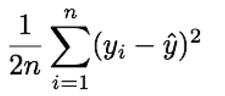

Where n is the number of training examples, yi are the true label and y^i are the predicted labels.

By minimizing this loss with respect to the network parameters, we can find configuration where the loss is at a minimum and the network is ale to predict the correct labels with high accuracy. We find this minimum using a process called gradient descent. The gradient is the slope of the loss function and points in the direction of faster change. To get to the minimum in the least amount of time, we then want to follow the gradient (downwards). You can think of this like descending a mountain by following the steepest slope to the base.

# **Backpropagation**
For single layer networks, gradinet descent in straightforward to implement. However it's more complicated for deeper, multiplayer neural networks like the one we've built. Complicated enough that it look about 30 years before researchers figured out how to train multilayer networks.

Training multiplayer networks is done through backpropagation which is really just an application of the chain rule from calculus. It's easiest to understand if we convert a two layer network into a graph representation

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.56MB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 57.2kB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.34MB/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [2]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3113, grad_fn=<NllLossBackward0>)


Here’s a detailed explanation of every part of the code:

---

### **1. Model Definition**

```python
model = nn.Sequential(
    nn.Linear(784, 128),  # Input layer
    nn.ReLU(),           # Activation function for first hidden layer
    nn.Linear(128, 64),  # Hidden layer
    nn.ReLU(),           # Activation function for second hidden layer
    nn.Linear(64, 10)    # Output layer
)
```

#### **Components:**

1. **`nn.Sequential`:**
   - A container for stacking layers in sequence.
   - Automatically connects the output of one layer to the input of the next.

2. **`nn.Linear(784, 128)`:**
   - Fully connected layer.
   - Takes an input of size **784** (28x28 pixels flattened into a vector).
   - Outputs **128** features for the first hidden layer.

3. **`nn.ReLU()`:**
   - Activation function: **Rectified Linear Unit**.
   - Applies the function \( f(x) = \max(0, x) \) element-wise, introducing non-linearity to the model.
   - Helps the network learn more complex patterns.

4. **`nn.Linear(128, 64)` and `nn.Linear(64, 10)`**:
   - Additional fully connected layers.
   - The last layer outputs **10 logits**, corresponding to the 10 classes (digits 0-9).

---

### **2. Loss Function**

```python
criterion = nn.CrossEntropyLoss()
```

#### **Components:**

- **`nn.CrossEntropyLoss`:**
  - Combines:
    1. **LogSoftmax:** Converts raw scores (logits) to log-probabilities:
       \[
       \text{log-softmax}(x_i) = \log \left( \frac{\exp(x_i)}{\sum_j \exp(x_j)} \right)
       \]
    2. **Negative Log Likelihood (NLL):** Measures the difference between predicted log-probabilities and the true labels.

#### **Why Use CrossEntropyLoss?**
- It directly works with raw logits and automatically applies the softmax transformation, so you don’t need to include a softmax layer in your model.

---

### **3. Getting the Data**

```python
images, labels = next(iter(trainloader))
```

#### **What It Does:**
- **`iter(trainloader)`:**
  - Converts `trainloader` into an iterator to fetch batches of data.
- **`next()`:**
  - Fetches the next batch (images and labels) from the iterator.

#### **What Are `images` and `labels`?**
- **`images`:**
  - A tensor of shape `[batch_size, 1, 28, 28]`.
  - Contains grayscale images of size \( 28 \times 28 \) pixels.
- **`labels`:**
  - A tensor of shape `[batch_size]`.
  - Contains the ground truth labels for the batch (digits 0-9).

---

### **4. Flattening Images**

```python
images = images.view(images.shape[0], -1)
```

#### **What It Does:**
- Reshapes the tensor to `[batch_size, 784]`.
  - **`images.shape[0]`**: Keeps the batch size as it is.
  - **`-1`**: Flattens the remaining dimensions into a single vector (28x28 = 784).

#### **Why Flatten?**
- Fully connected layers (`nn.Linear`) expect 2D input: `[batch_size, input_features]`.
- Since images are initially 3D tensors (`[batch_size, 1, 28, 28]`), they need to be flattened.

---

### **5. Forward Pass**

```python
logits = model(images)
```

#### **What Happens Here:**
1. The `images` tensor (input) is passed through the `model`.
2. Each layer processes the input sequentially:
   - Input layer → ReLU → Hidden layer → ReLU → Output layer.
3. The final output (`logits`) is a tensor of shape `[batch_size, 10]`.

---

### **6. Calculate the Loss**

```python
loss = criterion(logits, labels)
```

#### **Components:**
- **`logits`:**
  - The raw scores (not probabilities) for each of the 10 classes.
- **`labels`:**
  - Ground truth labels for the batch.

#### **How It Works:**
1. `criterion` first applies **softmax** to `logits` to convert them into probabilities.
2. Then, it compares the predicted probabilities with the true labels to compute the loss.

---

### **7. Print the Loss**

```python
print(loss)
```

#### **Output:**
- A single scalar value representing how far the predictions are from the true labels.
- Example:
  ```
  tensor(2.3678, grad_fn=<NllLossBackward>)
  ```

---

### **End-to-End Explanation:**

1. **Model Initialization:**
   - A neural network is defined with 3 fully connected layers and ReLU activations.
2. **Data Preparation:**
   - A batch of images and labels is fetched and flattened.
3. **Forward Pass:**
   - Images are passed through the network to compute raw scores (`logits`).
4. **Loss Calculation:**
   - The loss is computed using `CrossEntropyLoss`, which compares logits with true labels.

In my experience it's more convenient to build the model with a log-softmax output using `nn.LogSoftmax` or `F.log_softmax`. THe you can get the actual probabilities by taking the exponential `torch.exp(output)`. With a log-softmax output, you want to use the negative log livelhood loss, `nn.NLLoss`.

# **practice**

In [3]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1))

criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.003)

epochs = 5
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    # Flatten MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)

    # TODO: Training pass
    optimizer.zero_grad()

    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.788484054841975
Training loss: 0.7680185044180355
Training loss: 0.5040657781302802
Training loss: 0.4235450773160341
Training loss: 0.3843182680576341


Here’s an explanation of the full code for training a neural network on the MNIST dataset:

---

### **1. Model Definition**

```python
model = nn.Sequential(
    nn.Linear(784, 128),  # Input layer
    nn.ReLU(),           # First hidden layer with ReLU activation
    nn.Linear(128, 64),  # Second hidden layer
    nn.ReLU(),           # Second hidden layer activation
    nn.Linear(64, 10),   # Output layer for 10 classes
    nn.LogSoftmax(dim=1) # LogSoftmax activation for class probabilities
)
```

- **`nn.LogSoftmax(dim=1)`**:
  - Converts the logits (raw scores) into log probabilities along the class dimension (`dim=1`).
  - The log probabilities are used by the `NLLLoss` function.

---

### **2. Loss Function and Optimizer**

```python
criterion = nn.NLLLoss()
```

- **`nn.NLLLoss`**:
  - Stands for **Negative Log Likelihood Loss**.
  - Works with log probabilities (output from `LogSoftmax`).
  - Compares predicted probabilities with the actual labels.

```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.003)
```

- **`torch.optim.SGD`**:
  - Implements **Stochastic Gradient Descent** optimization.
  - `model.parameters()`: Specifies which parameters (weights and biases) to optimize.
  - `lr=0.003`: Sets the learning rate, which controls how much the weights are updated during each step.

---

### **3. Training Loop**

#### **Epochs**
```python
epochs = 5
```
- Defines the number of times the entire dataset is passed through the network.

#### **For Loop**
```python
for e in range(epochs):
```
- Iterates over the number of epochs.

#### **Initialize Running Loss**
```python
running_loss = 0
```
- Tracks the cumulative loss for the epoch to calculate the average training loss.

#### **Iterating Through Batches**
```python
for images, labels in trainloader:
```
- Loops through each batch of images and labels from the `trainloader`.

#### **Flatten Images**
```python
images = images.view(images.shape[0], -1)
```
- Converts images from \( [\text{batch size}, 1, 28, 28] \) to \( [\text{batch size}, 784] \).

---

### **4. Training Pass**

#### **Zero Gradients**
```python
optimizer.zero_grad()
```
- Clears the gradients from the previous step to avoid accumulation.

#### **Forward Pass**
```python
output = model.forward(images)
```
- Passes the input images through the model to compute predictions.

#### **Calculate Loss**
```python
loss = criterion(output, labels)
```
- Compares the predicted probabilities (`output`) with the actual labels using `NLLLoss`.

#### **Backpropagation**
```python
loss.backward()
```
- Computes gradients for each parameter (weights and biases) with respect to the loss.

#### **Optimize Parameters**
```python
optimizer.step()
```
- Updates the model's parameters using the gradients and the learning rate.

#### **Track Running Loss**
```python
running_loss += loss.item()
```
- Adds the scalar value of the loss to the cumulative running loss.

---

### **5. Print Training Loss**

```python
else:
    print(f"Training loss: {running_loss/len(trainloader)}")
```

- **`running_loss/len(trainloader)`**:
  - Divides the cumulative loss by the number of batches to calculate the average training loss for the epoch.

---

### **Output Example**
After running the code, you might see:

```plaintext
Training loss: 0.5634
Training loss: 0.4322
Training loss: 0.3768
Training loss: 0.3412
Training loss: 0.3125
```

---

### **How the Model Learns**
1. **Forward Pass:**
   - The input data is passed through the model to make predictions.
2. **Loss Calculation:**
   - The loss measures how far the predictions are from the actual labels.
3. **Backward Pass:**
   - Gradients are computed using backpropagation to adjust the model's parameters.
4. **Optimization:**
   - The optimizer updates the parameters to minimize the loss.